In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import string

In [170]:
pd.set_option("display.max_colwidth", None)

In [171]:
train_df = pd.read_csv("../raw_data/train.csv")

In [172]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [173]:
train_df.shape

(7613, 5)

# Count_words

In [174]:
size_word_list = train_df['text'].tolist()
train_df['size_word'] = [len(x.split()) for x in size_word_list]

In [175]:
train_df.sort_values(by=['size_word'], ascending=False)

,id,keyword,location,text,target,size_word
954,1381,body%20bag,NaN,If you have a son or a daughter would you like to see them going to a war with Iran and come back in a body bag? Let the #Republicans know,0,31
5005,7138,military,NaN,I remember when I worked at Mcdonalds I use to be hours late because we used military time and I use to mess up when I had to be there :/,0,31
4432,6305,hostage,NaN,When u get mugged with ur gf u come up with the best excuses not to look like a bitch 'I wanted to fight but what if he held u hostage?',0,31
2089,3003,death,NaN,I will only call or text 2 niggas my bff &amp; my boyfriend ???? I love my boys to death. No other niggas can hold my attention like them ??,0,30
6794,9733,tragedy,NaN,This is a tragedy: I added the wrong book to my TBR list now I can't find the right one. This is what comes of browsing just on gr homepage.,0,30
...,...,...,...,...,...,...
4971,7088,meltdown,NaN,Meltdown,0,1
24,36,NaN,NaN,LOOOOOOL,0,1
6705,9605,thunder,NaN,Thunder???,0,1
3670,5224,fatality,Rafael castillo,fatality,0,1


In [176]:
size_0 = train_df[train_df['target']==0]
size_0_mean = np.mean(size_0['size_word'])
size_0_mean

14.704744357438969

In [177]:
size_1 = train_df[train_df['target']==1]
size_1_mean = np.mean(size_1['size_word'])
size_1_mean

15.167532864567411

In [178]:
list_word = [x.split() for x in size_word_list]

In [179]:
train_df.shape

(7613, 6)

In [188]:
train_df['keyword'] = train_df['keyword'].fillna('')
train_df

,id,keyword,location,text,target,size_word
0,1,,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,13
1,4,,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,22
3,6,,NaN,"13,000 people receive #wildfires evacuation orders in California",1,8
4,7,,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,16
...,...,...,...,...,...,...
7608,10869,,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,11
7609,10870,,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,20
7610,10871,,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,8
7611,10872,,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,19


In [192]:
train_df['full_tweet'] = train_df["keyword"].map(str) + " " + train_df["text"]
train_df

,id,keyword,location,text,target,size_word,full_tweet
0,1,,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,13,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1,4,,NaN,Forest fire near La Ronge Sask. Canada,1,7,Forest fire near La Ronge Sask. Canada
2,5,,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,22,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3,6,,NaN,"13,000 people receive #wildfires evacuation orders in California",1,8,"13,000 people receive #wildfires evacuation orders in California"
4,7,,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,16,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school
...,...,...,...,...,...,...,...
7608,10869,,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,11,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5
7609,10870,,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,20,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.
7610,10871,,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,8,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ
7611,10872,,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,19,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.


# Analyse - Target 1

In [193]:
train_df_1 = train_df[train_df['target']==1]

In [194]:
word_0 = train_df_0['text'].tolist()

In [195]:
#contains !

exclamation_1 = 0
for i in word_1 : 
    for j in i : 
        if j == "#":
            exclamation_1 += 1
exclamation_1

1703

In [196]:
def create_corpus(target):
    corpus=[]
    
    for x in train_df[train_df['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

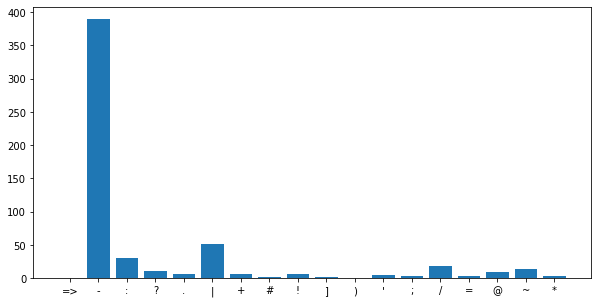

In [201]:
plt.figure(figsize=(10,5))
corpus_1 =create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus_1):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y);

In [208]:
res_1 = {}

for i in corpus_1:
    res_1[i] = corpus_1.count(i)

{'Our': 16, 'Deeds': 1, 'are': 150, 'the': 1051, 'Reason': 2, 'of': 888, 'this': 110, '#earthquake': 8, 'May': 9, 'ALLAH': 1, 'Forgive': 1, 'us': 11, 'all': 48, 'Forest': 27, 'fire': 108, 'near': 44, 'La': 11, 'Ronge': 1, 'Sask.': 1, 'Canada': 2, 'All': 18, 'residents': 4, 'asked': 1, 'to': 706, "'shelter": 1, 'in': 1037, "place'": 1, 'being': 26, 'notified': 1, 'by': 244, 'officers.': 1, 'No': 27, 'other': 15, 'evacuation': 26, 'or': 42, 'shelter': 4, 'place': 12, 'orders': 9, 'expected': 9, '13,000': 1, 'people': 83, 'receive': 2, '#wildfires': 5, 'California': 86, 'Just': 17, 'got': 28, 'sent': 4, 'photo': 4, 'from': 206, 'Ruby': 1, '#Alaska': 1, 'as': 139, 'smoke': 9, 'pours': 1, 'into': 69, 'a': 730, 'school': 16, '#RockyFire': 4, 'Update': 5, '=>': 1, 'Hwy.': 4, '20': 9, 'closed': 13, 'both': 6, 'directions': 1, 'due': 22, 'Lake': 6, 'County': 23, '-': 389, '#CAfire': 1, '#flood': 3, '#disaster': 5, 'Heavy': 7, 'rain': 21, 'causes': 7, 'flash': 13, 'flooding': 19, 'streets': 2, '

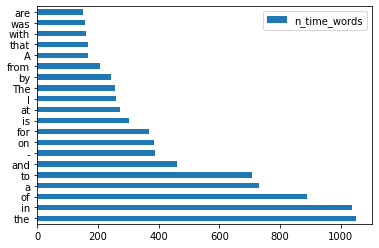

In [218]:
df_1 = pd.DataFrame(res_1, index=[0]).T
df_1 = df_1.rename(columns={0: 'n_time_words',})
df_1 = df_1.sort_values(by=['n_time_words'], ascending=False)
df_1.head(20).plot(kind='barh');

# Analyse - Target 0

In [198]:
train_df_0 = train_df[train_df['target']==0]

In [199]:
word_0 = train_df_0['text'].tolist()

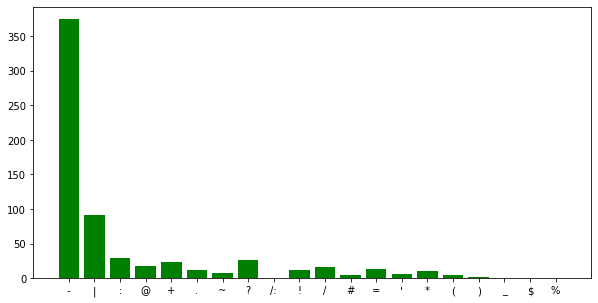

In [202]:
plt.figure(figsize=(10,5))
corpus_0 = create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus_0):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green');

In [219]:
res_0 = {}

for i in corpus_0:
    res_0[i] = corpus_0.count(i)

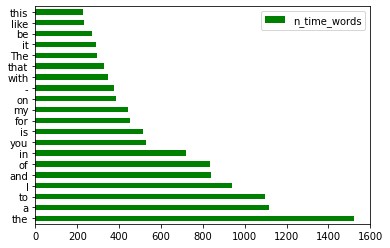

In [220]:
df_0 = pd.DataFrame(res_0, index=[0]).T
df_0 = df_0.rename(columns={0: 'n_time_words',})
df_0 = df_0.sort_values(by=['n_time_words'], ascending=False)
df_0.head(20).plot(kind='barh', color='green');